In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

In [3]:
path = ""
data = pd.read_csv(path)
data = data.iloc[:, [1, 14, 15, 16]]
data = data.replace("Oui", True)
data = data.replace("Non", False)
data = data.replace("Homme", "Male")
data = data.replace("Femme", "Female")
data = data.replace("Non-binaire", "NB")
data = data.rename(columns={"A02_genre_texte": "gender", "B11_genre_maladie": "B11", "B12_genre_question": "B12", "B13_genre_erreur" : "B13"}, errors="raise")

In [7]:
males = data[data["gender"] == "Male"]
males = males.drop(columns="gender")
females = data[data["gender"] == "Female"]
females = females.drop(columns="gender")
nb = data[data["gender"] == "NB"]
nb = nb.drop(columns="gender")
males = males.dropna()
females = females.dropna()
nb = nb.dropna()
print("amount of males in the survey:", len(males))
print("amount of females in the survey:", len(females))
print("amount of non-binary in the survey:", len(nb))
print("")
print("mean in the B11 column for males =", males["B11"].mean().round(3))
print("mean in the B11 column for females =", females["B11"].mean().round(3))
print("mean in the B11 column for non-binary =", nb["B11"].mean().round(3))
print("")
print("mean in the B12 column for males =", males["B12"].mean().round(3))
print("mean in the B12 column for females =", females["B12"].mean().round(3))
print("mean in the B12 column for non-binary =", nb["B12"].mean().round(3))
print("")
print("mean in the B13 column for males =", males["B13"].mean().round(3))
print("mean in the B13 column for females =", females["B13"].mean().round(3))
print("mean in the B13 column for non-binary =", nb["B13"].mean().round(3))

amount of males in the survey: 75
amount of females in the survey: 120
amount of non-binary in the survey: 21

mean in the B11 column for males = 2.587
mean in the B11 column for females = 1.925
mean in the B11 column for non-binary = 1.571

mean in the B12 column for males = 2.387
mean in the B12 column for females = 2.625
mean in the B12 column for non-binary = 5.333

mean in the B13 column for males = 1.293
mean in the B13 column for females = 1.433
mean in the B13 column for non-binary = 4.19


In [157]:
data.head(5)

,gender,B11,B12,B13
0,Male,1.0,4.0,1
1,Female,2.0,3.0,1
2,Female,1.0,3.0,1
3,Female,1.0,5.0,1
4,Female,3.0,3.0,1


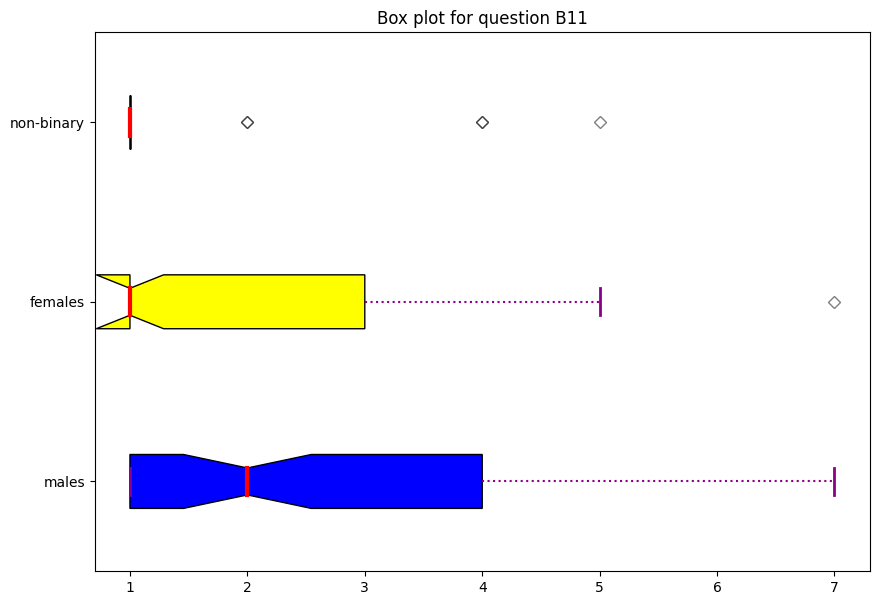

In [158]:
# plot for question B11
males_b11 = males["B11"].tolist()
females_b11 = females["B11"].tolist()
nb_b11 = nb["B11"].tolist()
data_plots_b11 = [males_b11, females_b11, nb_b11]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_plots_b11, patch_artist = True,
                notch ='True', vert = 0)
colors = ['#0000FF',
          '#FFFF00', '#FF00FF']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
ax.set_yticklabels(['males', 'females',
                    'non-binary'])
plt.title("Box plot for question B11")
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.show()

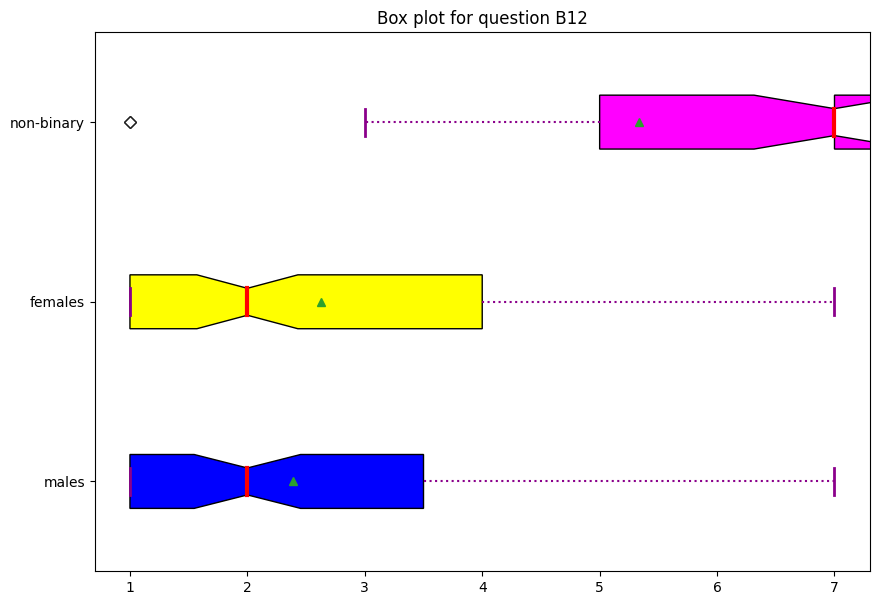

In [162]:
# plot for question B12
males_b12 = males["B12"].tolist()
females_b12 = females["B12"].tolist()
nb_b12 = nb["B12"].tolist()
data_plots_b12 = [males_b12, females_b12, nb_b12]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_plots_b12, patch_artist = True,
                notch ='True', vert = 0, showmeans=True)
colors = ['#0000FF',
          '#FFFF00', '#FF00FF']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
ax.set_yticklabels(['males', 'females',
                    'non-binary'])
plt.title("Box plot for question B12")
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.show()

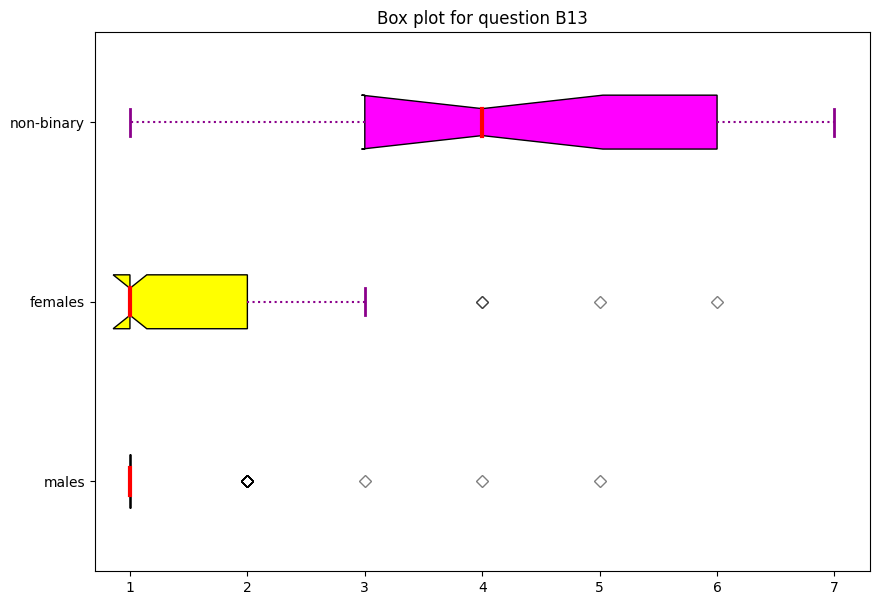

In [160]:
# plot for question B13
males_b13 = males["B13"].tolist()
females_b13 = females["B13"].tolist()
nb_b13 = nb["B13"].tolist()
data_plots_b13 = [males_b13, females_b13, nb_b13]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_plots_b13, patch_artist = True,
                notch ='True', vert = 0, showmeans=True)
colors = ['#0000FF',
          '#FFFF00', '#FF00FF']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
ax.set_yticklabels(['males', 'females',
                    'non-binary'])
plt.title("Box plot for question B13")
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.show()

In [161]:
print('B11:', stats.kruskal(males["B11"], females["B11"], nb["B11"]))
print('B12:', stats.kruskal(males["B12"], females["B12"], nb["B12"]))
print('B13:', stats.kruskal(males["B13"], females["B13"], nb["B13"]))


B11: KruskalResult(statistic=15.317488299926785, pvalue=0.00047189967404393635)
B12: KruskalResult(statistic=26.517104443076377, pvalue=1.745355633681029e-06)
B13: KruskalResult(statistic=51.69910168479064, pvalue=5.938581341979491e-12)
